### Credit Card Defaulters prediction

# Table of Contents

[Objective](#ob)

[Importing the data](#id)

[Descriptive Statistics, Visualizations and Graphs](#dd)

[Data cleaning](#dc)

[Algorithm Selection](#as)

[ROC, AUC](#ra)

[Observations & Conclusions](#oc)

#### Objective: <a name='ob'></a>
Goal of the study is to create a model that predicts if a client will default on credit card payment in next month.
This is a Supervised binary classification problem. Where Defaulter Yes(1) or No(0) is the dependant variable

#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
both the individual consumer credit and his/her family (supplementary) credit. 

**SEX**
Gender (1 = male; 2 = female). 

**Education:**
(1 = graduate school; 2 = university; 3 = high school; 4 = others). 

**MARRIAGE:**
Marital status (1 = married; 2 = single; 3 = others). 

**Age:**
(year). 

---

** PAY_0 to PAY_6: **

History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: <br/>
PAY_0  = the repayment status in September, 2005; <br/>
PAY_2 = the repayment status in August, 2005; . . .;<br/>
PAY_6  = the repayment status in April, 2005. <br/>

The measurement scale for the repayment status is: <br/>
-1 = pay duly; <br/>
1 = payment delay for one month; <br/>
2 = payment delay for two months; . . .; <br/>
8 = payment delay for eight months; <br/>
9 = payment delay for nine months and above. <br/>

---    
** BILL_AMT1- BILL_AMT6:**<br/>
BILL_AMT1: Amount of bill statement (NT dollar). <br/>
BILL_AMT2 = amount of bill statement in September, 2005; <br/>
BILL_AMT3 = amount of bill statement in August, 2005; . . .; <br/>
BILL_AMT6 = amount of bill statement in April, 2005. <br/>

---
**PAY_AMT1-PAY_AMT6:**<br/>
Amount of previous payment (NT dollar). <br/>
PAY_AMT1 = amount paid in September, 2005; <br/>
PAY_AMT2 = amount paid in August, 2005; . . .;<br/>
PAY_AMT6 = amount paid in April, 2005. <br/>



##### Importing data <a name='id'></a>

In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("default of credit card clients.xls")

In [3]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


Bottom 6 rows of the dataset

#### Descriptive Statistics, Visualizations and Graphs <a name='dd'></a>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

No of columns: 25<br/>
No of rows: 30000<br/>
No Missing values

##### Categorical variable description

In [5]:
data[["SEX","EDUCATION","MARRIAGE"]].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


##### Observation: 
No missing data, but two things to note:

1. Education has category 0 and 6 that are unlabeled.

2. Marriage has a label 0 that is also unlabeled

Need to investigate

##### Payment delay description


In [6]:
data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


##### Observation:
There is a category -2 in all Pay_# columns which are unlabeled.

If 1, 2, 3, etc are the months of delay, 0 should be labeled 'pay duly' and negative value can also be labeled as 0. 


##### Bill Statement description 

In [7]:
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Negative values can be interpreted as credit? Has to be investigated

##### Previous Payment Description 


In [8]:
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


##### Limit Balance description

In [9]:
data.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

##### Observations: 
Range is very high.

##### Limit Balance and Default Rate Distribution

Text(0.5,1.05,'Limit Balance and Default Rate Distribution')

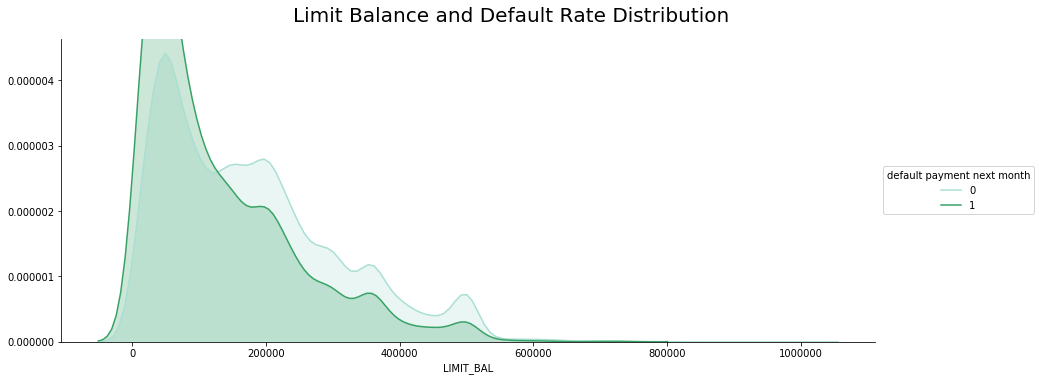

In [10]:
lim_bal_dist = sns.FacetGrid(data, hue = 'default payment next month', aspect = 2.5, size = 5, palette = 'BuGn')
lim_bal_dist.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
lim_bal_dist.add_legend()
plt.suptitle('Limit Balance and Default Rate Distribution', fontsize = 20, y = 1.05)

##### Observations:

It seems that those with lower credit limits are more likely to default, whereas those with higher credit limits are less likely to default.


##### Age and Default Rate Distribution

Text(0.5,1.05,'Age and Default Rate Distribution')

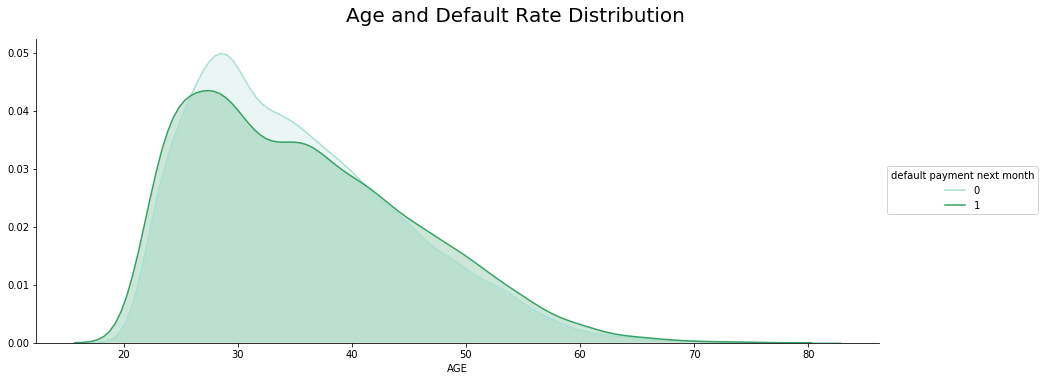

In [11]:
age_survival_dist = sns.FacetGrid(data, hue = 'default payment next month', aspect = 2.5, size = 5, palette = 'BuGn')
age_survival_dist.map(sns.kdeplot, 'AGE', shade = True)
age_survival_dist.add_legend()
plt.suptitle('Age and Default Rate Distribution', fontsize = 20, y = 1.05)

##### Observation: 
From the above graph, the distributions are quite similar and it doesn't seems like age plays a major role in defaulters list. But, those who are in between 25-40 have a slightly lower chance of default.

#### Data cleaning <a name='dc'></a>

In [12]:
data.SEX.value_counts() #count of Sex column: 1-Male 2-Female

2    18112
1    11888
Name: SEX, dtype: int64

**Note**: So, there are 11888 males and 18112 females out of 30000 persons

In [13]:
data.MARRIAGE.value_counts() #count of Marriage column: Marital status (1 = married; 2 = single; 3 = others). 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

**Note:** Out of 30000 members, 13659 are married, 15964 are single, 323 belongs to others who might be divorced, widow etc and 54 are not labeled under any category.. Need to investigate

In [14]:
data.EDUCATION.value_counts()  #count of Education column: (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**Note:** Total 30000 members in which 10585 are graduates, 14030 are from University, 4917 are high school candidates, 123 belongs to others and 0,5,6 are unlabeled.. Need to investigate.. 

##### Fixing Mislabeled entries

In [15]:
data['MARRIAGE'].replace(0, 3, inplace = True) #### replacing unlabeled category to 3rd category
data['EDUCATION'].replace([0, 5, 6], 4, inplace = True) #### replaced unlabeled categories to 4the category
data['PAY_0'].replace([-2,-1], 0, inplace = True) #### replaced unlabeled categories -2,-1 to 0
data['PAY_2'].replace([-2,-1], 0, inplace = True)
data['PAY_3'].replace([-2,-1], 0, inplace = True)
data['PAY_4'].replace([-2,-1], 0, inplace = True)
data['PAY_5'].replace([-2,-1], 0, inplace = True)
data['PAY_6'].replace([-2,-1], 0, inplace = True)

In [16]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Note:** From the above findings using describe function, replaced unlabeled categories to others category.

##### Education Vs Defaulters

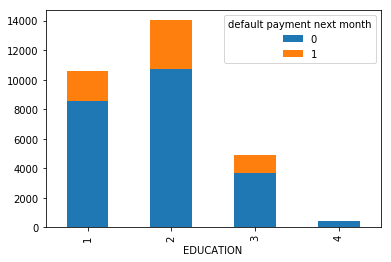

In [17]:
ed = data.groupby(['EDUCATION', 'default payment next month']).size().unstack()
ed.plot(kind = 'bar', stacked = True)

In [18]:
ed['perc'] = (ed[1]/(ed[0] + ed[1]))
ed

default payment next month,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


##### Observation: 
It seems that the higher is the education, the lower is the probability of defaulting the next month. Only exception is for the category labeled "Other".

##### Marriage Vs Defaulters

Text(0.5,0,'Marital Status')

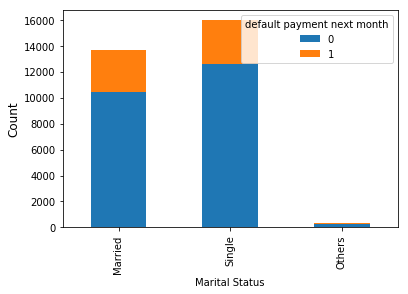

In [19]:
mar = data.groupby(['MARRIAGE', 'default payment next month']).size().unstack()
mar.plot(kind = 'bar', stacked = True)
N = 3
ind = np.arange(N)
plt.xticks(ind, ('Married', 'Single', 'Others'))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Marital Status')


In [20]:
mar['perc'] = (mar[1]/(mar[0] + mar[1]))
mar

default payment next month,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


##### Observations:

Here it seems that married people are most likely to default than Single. Also another category 'Others' also more likely to default


##### Final data

In [21]:
Final_data = data.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'}) ### renaming column names

Final_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Changed the name of columns 'default payment next month' to 'def_pay' and 'PAY_0' to 'PAY_1' for convenience.

##### Dropping "ID" column

In [22]:
## del(Final_data.ID)
Final_data = Final_data.drop(['ID'], axis = 1)
Final_data.shape

(30000, 24)

Removing ID column as it is a non siginificant variable.

##### Correlation

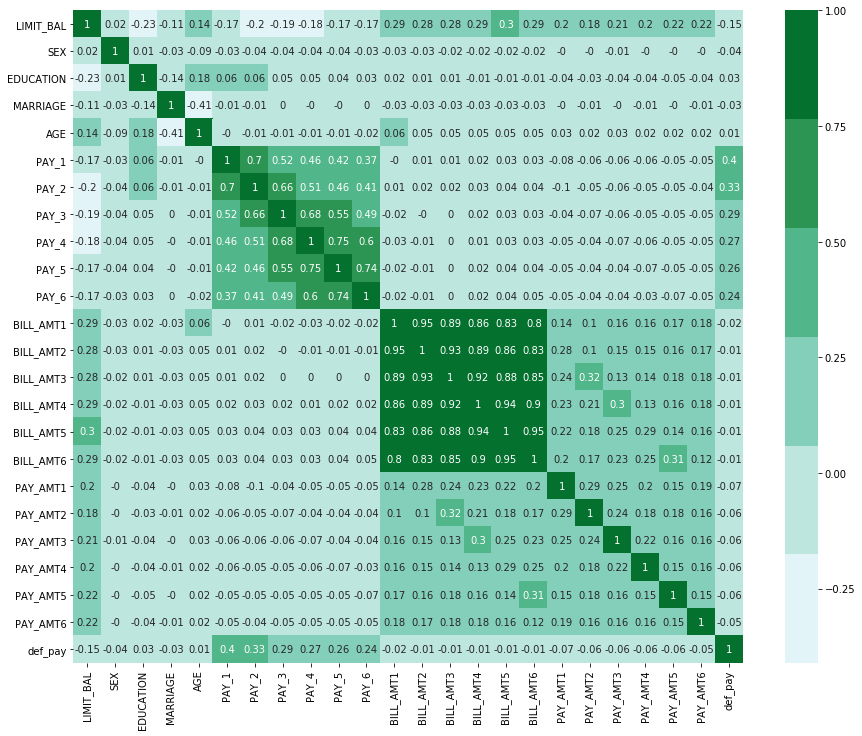

In [23]:
plt.figure(figsize=(15,12))
cor = round(Final_data.corr(),2)
sns.heatmap(cor, cmap = sns.color_palette('BuGn'), annot = True)

##### Observation:
The variable that seems most correlated with defaulting label and show highest contribution is Payment statuses PAY_#. 

'BILL_AMTX' are highly correlated to each other, but very less correlation to target label 'def_pay'. Such features can be dropped without losing significant prediction power.


##### Dropping BILL_AMTX columns 

In [24]:
Final_data = Final_data.drop(Final_data.columns[11:17], axis = 1)
Final_data.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000,2,2,1,24,2,2,0,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,2,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000,0


Dropped bill_amt columns as they are highly correlated to each other

##### Data partition

In [25]:
from sklearn.model_selection import train_test_split
features = Final_data.drop('def_pay', axis=1)
target = Final_data['def_pay']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=100)

##### Algorithm Selection <a name='as'></a>

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### SVM classification

In [27]:
svc=SVC(kernel='rbf')
svc_fit = svc.fit(X_train,y_train)
y_pred_test=svc_fit.predict(X_test)
y_predict_train = svc_fit.predict(X_train)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report, roc_curve, precision_recall_curve, auc
##### False positive Rate, True Positive rate, ROC curve, AUC, Precision_recall Curve for SVM
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_test)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_test)

In [29]:
print("Train Accuracy Score:", accuracy_score(y_train, y_predict_train))
print("Test Accuracy Score:", accuracy_score(y_test, y_pred_test))

Train Accuracy Score: 0.99
Test Accuracy Score: 0.771222222222


##### Note:
Train accuracy is higher than Test accuracy. It is an overfitting model

###### Confustion Matrix and Classification Report

In [30]:
from sklearn.metrics import confusion_matrix,classification_report, roc_curve, precision_recall_curve, auc
cnf_matrix = confusion_matrix(y_test,y_pred_test)
print ('confusion matrix of test dataset = \n',cnf_matrix)
print(classification_report(y_test, y_pred_test))

confusion matrix of test dataset = 
 [[6905   22]
 [2037   36]]
             precision    recall  f1-score   support

          0       0.77      1.00      0.87      6927
          1       0.62      0.02      0.03      2073

avg / total       0.74      0.77      0.68      9000



##### PCA <br/>
Another dimensionality reduction method and done only on predictor numerical variables.

In [31]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=15)
pca_fit = pca.fit(features)

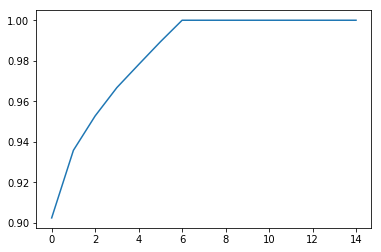

In [32]:
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_))
plt.show()

**Observations:**
From the above PCA graph, it is evident that **six** components has explained 98% of the variance.

In [33]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=6)
pca_features=pca1.fit_transform(features)
pca_features

array([[ -1.48003675e+05,  -1.72404589e+03,   1.46496438e+03,
         -5.48144788e+02,   1.09754803e+03,   2.60604178e+02],
       [ -4.81221599e+04,  -6.68522978e+03,   2.70710746e+03,
         -1.16204378e+03,   2.30787640e+03,  -3.96052634e+02],
       [ -7.78742010e+04,  -3.04048769e+03,  -2.74277736e+02,
         -3.15299567e+03,   1.78146989e+03,  -6.13705261e+02],
       ..., 
       [ -1.37150291e+05,   6.45228486e+03,  -1.06855407e+04,
          1.20043051e+04,   1.17059337e+04,   3.81245575e+03],
       [ -8.43262972e+04,   3.56434675e+04,  -2.63856378e+04,
          1.26019182e+04,  -5.80152695e+04,  -2.21880030e+04],
       [ -1.17862656e+05,  -9.12182753e+02,   8.56698478e+02,
         -9.65423411e+00,   5.91759192e+02,  -3.68952265e+02]])

In [34]:
###Top 6 principal components
principalDf = pd.DataFrame(data = pca_features, columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4','principal component 5','principal component 6'])
principalDf.head(3)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-148003.675413,-1724.045893,1464.964381,-548.144788,1097.548031,260.604178
1,-48122.159887,-6685.229778,2707.107457,-1162.043780,2307.876398,-396.052634
2,-77874.201015,-3040.487689,-274.277736,-3152.995669,1781.469887,-613.705261


In [35]:
##Concatenating dataframes along columns to make finalDf
FinalDf = pd.concat([principalDf, Final_data[['def_pay']]], axis = 1)
FinalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,def_pay
0,-148003.675413,-1724.045893,1464.964381,-548.144788,1097.548031,260.604178,1
1,-48122.159887,-6685.229778,2707.107457,-1162.043780,2307.876398,-396.052634,1
2,-77874.201015,-3040.487689,-274.277736,-3152.995669,1781.469887,-613.705261,0
3,-117859.846898,-806.347257,1047.491753,-187.646216,449.299376,-242.839166,0
4,-116273.076914,31497.960678,14779.354181,1061.001532,5084.146235,3942.710446,0


Lets apply again SVM model on the PCA features.<br/>
**Note:** <br/>
It is to be noted that PCA doesnt always guarantee better performance. The main use is dimensionality reduction.    

In [36]:
from sklearn.model_selection import train_test_split
features_pca = FinalDf.drop('def_pay', axis=1)
target_pca = FinalDf['def_pay']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca, target_pca, test_size=0.3, random_state=100)

In [37]:
svc=SVC(kernel='rbf')
svc_fit_pca = svc.fit(X_train_pca,y_train_pca)
y_pred_test_pca=svc_fit_pca.predict(X_test_pca)
y_predict_train_pca = svc_fit_pca.predict(X_train_pca)

In [38]:
print("Train Accuracy Score:", accuracy_score(y_train_pca, y_predict_train_pca))
print("Test Accuracy Score:", accuracy_score(y_test_pca, y_pred_test_pca))

Train Accuracy Score: 0.982904761905
Test Accuracy Score: 0.769555555556


**Observations:**<br/>
There is no much difference in accuracy before and after applying PCA.. It is clearing showing that the model is overfitting.<br/>
Let's try another model.

#### KNN classification - Grid Search

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_parameters = {'n_neighbors': range(6,9),
                  'leaf_size': [3, 5, 7, 10]
                 }

acc_scorer_knn = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj_knn = GridSearchCV(knn, knn_parameters, cv = 10, scoring = acc_scorer_knn)
grid_obj_knn = grid_obj_knn.fit(X_train_pca, y_train_pca)

# Set the algorithm to the best combination of parameters
knn = grid_obj_knn.best_estimator_

# Fit the best algorithm to the data. 
knn_fit = knn.fit(X_train_pca, y_train_pca)

In [40]:
y_predict_train_knn = knn_fit.predict(X_train_pca)
y_pred_test_knn= knn_fit.predict(X_test_pca)

print("Train Accuracy Score:", accuracy_score(y_train_pca, y_predict_train_knn))
print("Test Accuracy Score:", accuracy_score(y_test_pca, y_pred_test_knn))

Train Accuracy Score: 0.800142857143
Test Accuracy Score: 0.763333333333


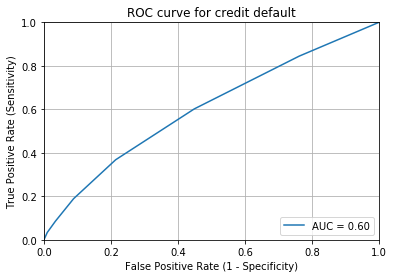

In [41]:
y_pred_test_knn= knn_fit.predict_proba(X_test_pca)[:,1]
##### False positive Rate, True Positive rate, ROC curve, AUC,
fpr, tpr, thresholds = metrics.roc_curve(y_test_pca,y_pred_test_knn)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr,label='AUC = %0.2f'% roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.title('ROC curve for credit default')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

**Note** The ROC curve should be considered as a means of evaluating the performance of our classifier model; the larger the area under the ROC curve the better the classifier can distinguish between two classes.

##### Observations and Conclusions:

**Observations:** <a name='oc'></a>

Credit card default is a serious issue that needs to be addressed. Based on the dataset, I can make the following conclusions:<br/>

1. The strongest predictors of default payment is history of past payment (particularly from the most recent month) and the amount of given credit, or limit balance. <br/>
2. Those with lower limit balance had a higher chance of default payment than people with higher limit balance.<br/>
3. People with graduate school or other education were less likely to default than those who only studied in university or high school. In fact, those with high school diplomas had a ~25% chance of default. <br/>
4. People with relationship status of "Other" also had a slightly higher chance of default.<br/>
5. Though age didn't play a large role in default, people between ages 25-40 have a higher chance of default; <br/>

**Recommendations**: There could also be additional information targeting the defualter's list.

**Conclusion:**
The best way to predict if a cardholder is likely to default on their credit card is with Random Forest.
